In [171]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import cv2, os

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


### Loading Image

In [152]:
data = []
labels = []
cur_path = '/home/hasan/DATA SET/gtsrb-german-traffic-sign/'


for i in range(43):
    path = os.path.join(cur_path,'train/',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("There something error")

### Converting lists into numpy arrays

In [153]:
data = np.array(data)
labels = np.array(labels)
print('Shape of data :',data.shape)
print('Shape of labels :',data.shape)

Shape of data : (39209, 30, 30, 3)
Shape of labels : (39209, 30, 30, 3)


### Splitting training data into training and testing data

In [154]:
Xtrain, xvalid, Ytrain, yvalid = train_test_split(data, labels, test_size=0.2, random_state=42)
print('Shape of Xtrain :',Xtrain.shape,'\n','Shape of xvalid :', xvalid.shape,'\n',
      'Shape of Ytrain :',Ytrain.shape,'\n','Shape of yvalid :',yvalid.shape)

Shape of Xtrain : (31367, 30, 30, 3) 
 Shape of xvalid : (7842, 30, 30, 3) 
 Shape of Ytrain : (31367,) 
 Shape of yvalid : (7842,)


### Converting the labels into one hot encoding

In [155]:
Ytrain_one_hot = to_categorical(Ytrain, 43)
yvalid_one_hot = to_categorical(yvalid, 43)
print('Shape of y_train :',Ytrain_one_hot.shape)
print('Shape of y_test :',yvalid_one_hot.shape)

Shape of y_train : (31367, 43)
Shape of y_test : (7842, 43)


In [156]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [157]:
#summary of the model
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 64)        

### Compilation of the model

In [158]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])


### Data Normalizing

In [159]:
#for train data
train_datagen = ImageDataGenerator(  
                      rescale=1./255,
                      )
train_datagen.fit(Xtrain)

#for validation data
valid_datagen = ImageDataGenerator(                
                      rescale=1./255
                      )
valid_datagen.fit(xvalid)

In [160]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2)
]

### Training The Model

In [161]:
model_history = model.fit_generator(train_datagen.flow(Xtrain, Ytrain_one_hot,batch_size=32),
                                    steps_per_epoch=len(Xtrain)/32, epochs=10, verbose=1,
                                    validation_data=valid_datagen.flow(xvalid, yvalid_one_hot))

Epoch 1/10
981/980 [==============================] - 100s 102ms/step - loss: 1.3571 - accuracy: 0.6133 - val_loss: 3.0908e-04 - val_accuracy: 0.9237
Epoch 2/10
981/980 [==============================] - 102s 104ms/step - loss: 0.3516 - accuracy: 0.8912 - val_loss: 0.0185 - val_accuracy: 0.9698
Epoch 3/10
981/980 [==============================] - 110s 112ms/step - loss: 0.2213 - accuracy: 0.9314 - val_loss: 0.0101 - val_accuracy: 0.9778
Epoch 4/10
981/980 [==============================] - 96s 98ms/step - loss: 0.1775 - accuracy: 0.9435 - val_loss: 0.0726 - val_accuracy: 0.9802
Epoch 5/10
981/980 [==============================] - 96s 98ms/step - loss: 0.1493 - accuracy: 0.9542 - val_loss: 3.3719e-04 - val_accuracy: 0.9847
Epoch 6/10
981/980 [==============================] - 105s 107ms/step - loss: 0.1283 - accuracy: 0.9597 - val_loss: 4.1127e-06 - val_accuracy: 0.9862
Epoch 7/10
981/980 [==============================] - 112s 114ms/step - loss: 0.1213 - accuracy: 0.9614 - val_loss: 

### Visualization of Accuracy and Loss

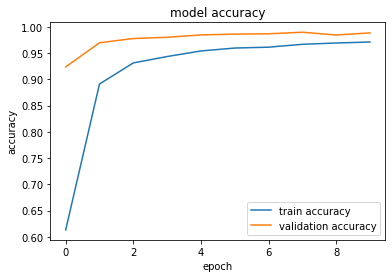

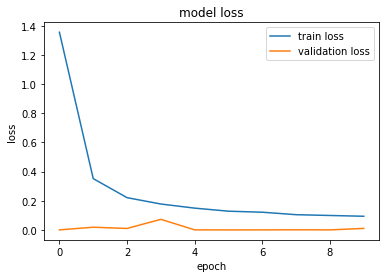

In [162]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='best')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='best')
plt.show()

### Predicting with Test Data

In [163]:
y_test = pd.read_csv('/home/hasan/DATA SET/gtsrb-german-traffic-sign/Test.csv')

In [164]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [165]:
path = '/home/hasan/DATA SET/gtsrb-german-traffic-sign/'
data=[]

full_path=path+imgs

for img in imgs:
    image = Image.open(path+img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [166]:
pred = model.predict_classes(X_test)

In [167]:
#Accuracy with the test data
print(accuracy_score(labels, pred))

0.9350752177355502


In [169]:
#printing classification report
print(classification_report(labels,pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        60
           1       0.90      0.97      0.93       720
           2       0.86      0.99      0.92       750
           3       0.98      0.89      0.93       450
           4       0.99      0.95      0.97       660
           5       0.95      0.81      0.87       630
           6       1.00      0.76      0.86       150
           7       0.86      0.96      0.91       450
           8       0.98      0.84      0.90       450
           9       0.93      1.00      0.96       480
          10       0.98      0.99      0.98       660
          11       0.85      0.96      0.90       420
          12       1.00      0.95      0.97       690
          13       1.00      0.97      0.99       720
          14       1.00      0.94      0.97       270
          15       0.96      0.90      0.93       210
          16       0.99      0.94      0.97       150
          17       0.98    

Text(205.82142857142858, 0.5, 'Predicted label')

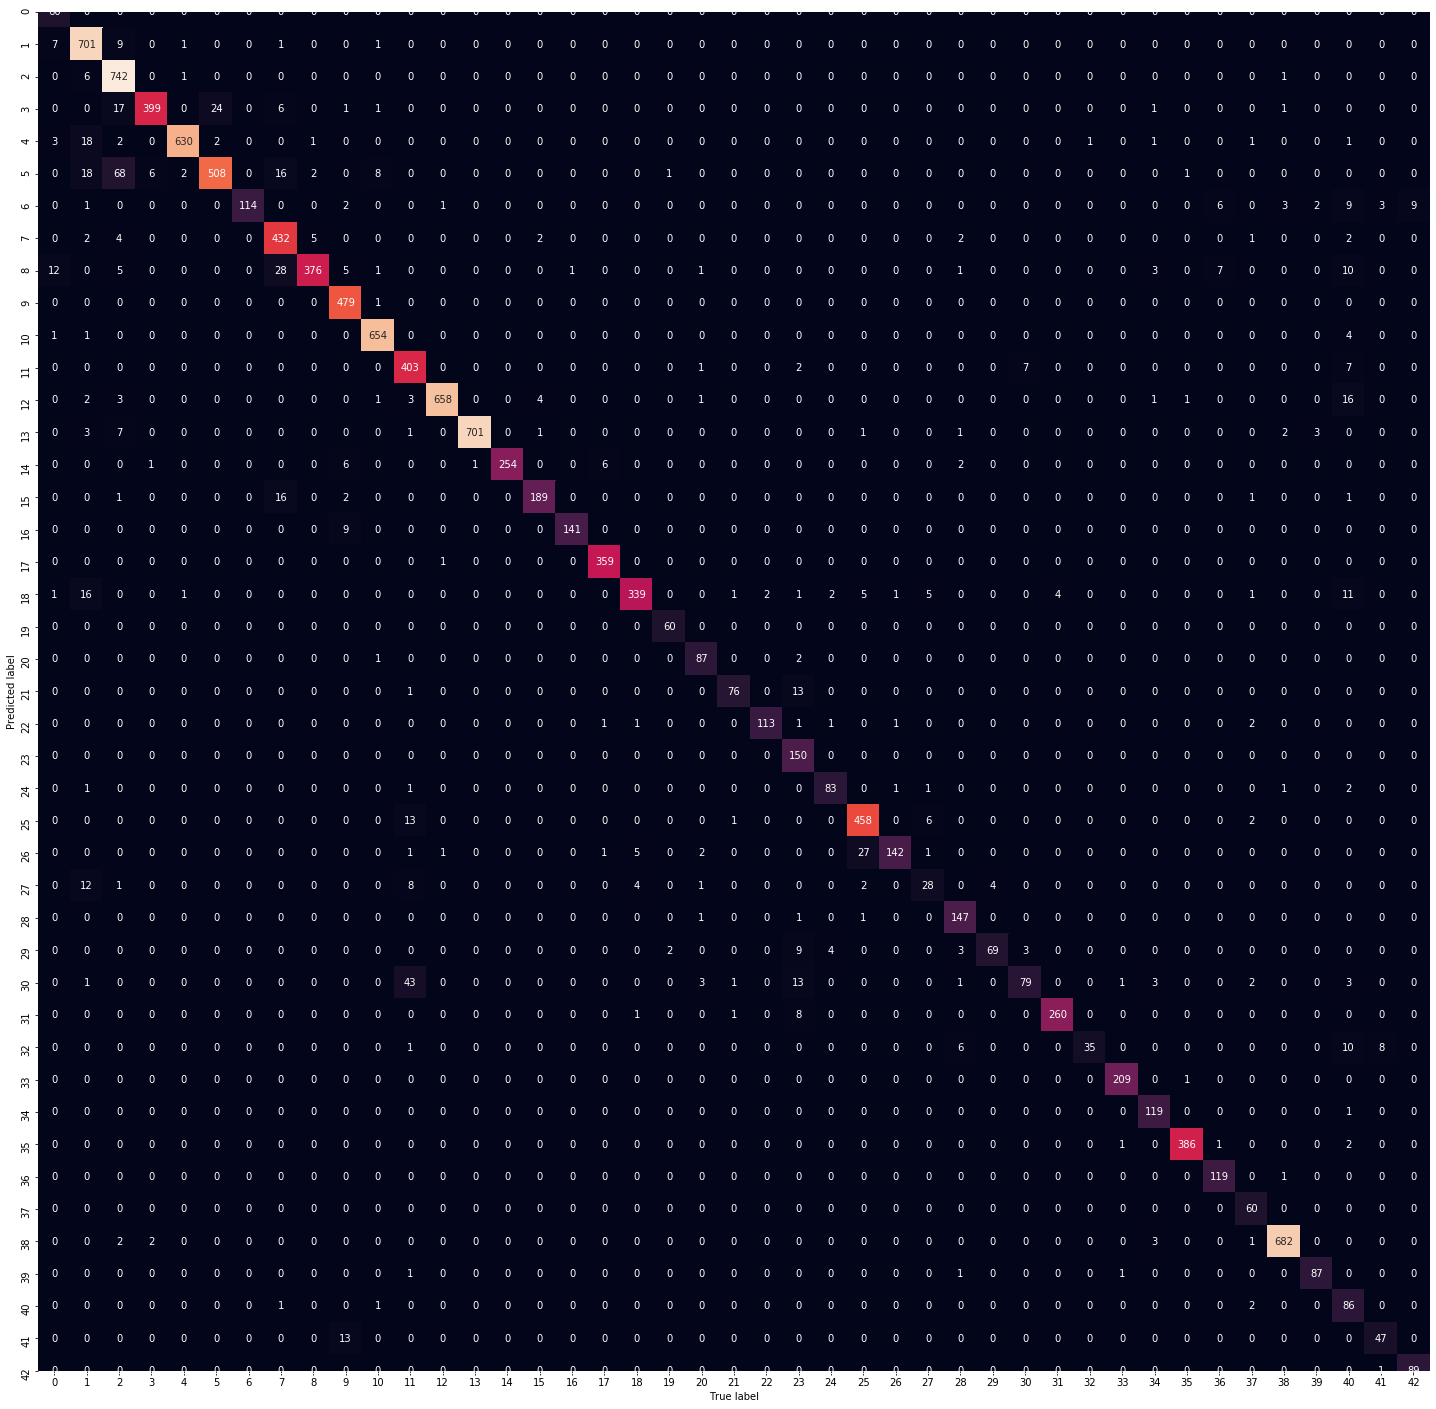

In [174]:
#printing confusion matrix
plt.figure(figsize=(25,25))
sns.heatmap(confusion_matrix(labels,pred), square=True, annot=True, cbar=False, fmt='d',)
plt.xlabel('True label')
plt.ylabel('Predicted label')